# A/B Testing

The goal of this tast is to help an international Online store finish the A/B test, given the data with technical description, the goal is to see if test data was carried out and to analyse the results.

Dashboard_link = https://public.tableau.com/profile/maria.fe.tarab#!/vizhome/GroupABconversion/Dashboard1?publish=yes

Preasentation = https://drive.google.com/file/d/1odLrnOpwcdG6JoJXTqljffdY5mBGwTey/view?usp=sharing

### Table of Contents
* <a href="#Step 1">Download the data ></a><br>
    * <a href="#marketinghead">Marketing Dataset</a><br>
    * <a href="#participantshead">Participants Dataset</a><br>
    * <a href="#usershead">Users Dataset</a><br>
    * <a href="#eventshead">Events Dataset</a><br>
        * <a href="#step1_conclusion">Conclusion</a><br>
* <a href="#Step 2">Exploratory data analysis</a><br>
    * <a href="#eventfunnel">Event Funnel</a><br>
    * <a href="#ABusers">New dataset for A / B group</a><br>
    * <a href="#eventsgroup">Number of events per group graph</a><br>
    * <a href="#eventdate">Number of events per date graph</a><br>
    * <a href="#ABtest">A/B Testing</a><br>
        * <a href="#step2_conclusion">Conclusion</a><br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import datetime as dt
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from plotly import graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px

%matplotlib inline 
from plotly.offline import iplot, init_notebook_mode
init_notebook_mode(connected=True)

<p><a name="Step 1"></a></p>

### Step 1. Download the data and prepare it for analysis

In [2]:
try:
    marketing = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\Final Project\AB testing/ab_project_marketing_events.csv',  sep=',')
except:
    marketing = pd.read_csv('/datasets/ab_project_marketing_events_us.csv', sep=',')

try:
    participants = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\Final Project\AB testing/final_ab_participants_upd.csv')
except:
    participants = pd.read_csv('/datasets/final_ab_participants_us.csv')
    
try:
    users = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\Final Project\AB testing/final_ab_new_users_upd.csv')
except:
    users = pd.read_csv('/datasets/final_ab_new_users_us.csv')

try:
    events = pd.read_csv(r'C:\Users\User\Documents\YandexDataA\Final Project\AB testing/final_ab_events_us.csv')
except:
    events = pd.read_csv('/datasets/final_ab_events_us.csv')

<p><a name="marketinghead"></a></p>

In [3]:
# check the head of the data frame
marketing.head()

,name,regions,start_dt,finish_dt
0,Christmas&New Year Promo,"EU, N.America",2020-12-25,2021-01-03
1,St. Valentine's Day Giveaway,"EU, CIS, APAC, N.America",2020-02-14,2020-02-16
2,St. Patric's Day Promo,"EU, N.America",2020-03-17,2020-03-19
3,Easter Promo,"EU, CIS, APAC, N.America",2020-04-12,2020-04-19
4,4th of July Promo,N.America,2020-07-04,2020-07-11


In [4]:
#check the info
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   name       14 non-null     object
 1   regions    14 non-null     object
 2   start_dt   14 non-null     object
 3   finish_dt  14 non-null     object
dtypes: object(4)
memory usage: 576.0+ bytes


The start_dt and finish:dt are in the wrong format and so therefore need to be converted to datetime64.

In [5]:
marketing['start_dt']= pd.to_datetime(marketing['start_dt'], format = '%Y-%m-%dT%H:%M')
marketing['finish_dt']= pd.to_datetime(marketing['finish_dt'], format = '%Y-%m-%dT%H:%M')

In [6]:
#calling the info again to check the changes
marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   name       14 non-null     object        
 1   regions    14 non-null     object        
 2   start_dt   14 non-null     datetime64[ns]
 3   finish_dt  14 non-null     datetime64[ns]
dtypes: datetime64[ns](2), object(2)
memory usage: 576.0+ bytes


<p><a name="participantshead"></a></p>

In [7]:
#check the head of participants dataset
participants.head()

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test


In [8]:
#check the shape
participants.shape

(14525, 3)

In [9]:
participants.duplicated().sum()

0

In [10]:
#call the info
participants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   user_id  14525 non-null  object
 1   group    14525 non-null  object
 2   ab_test  14525 non-null  object
dtypes: object(3)
memory usage: 340.6+ KB


The dataset looks clean.There are no null values and everything is in correct format.

<p><a name="usershead"></a></p>

In [11]:
#check the users dataset
users.head()

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone


In [12]:
#check for the shape
users.shape

(58703, 4)

In [13]:
#check for duplicated values
users.duplicated().sum()

0

In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     58703 non-null  object
 1   first_date  58703 non-null  object
 2   region      58703 non-null  object
 3   device      58703 non-null  object
dtypes: object(4)
memory usage: 1.8+ MB


In [15]:
#The first_date column has to be converted from object to datetime64 datatype
users['first_date']= pd.to_datetime(users['first_date'], format = '%Y-%m-%dT%H:%M')

<p><a name="eventshead"></a></p>

In [16]:
# check the events head
events.head()

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99


In [17]:
#check for events head
events.shape

(423761, 4)

In [18]:
#check if there are duplicated  rows
events.duplicated().sum()

0

In [19]:
#check for null values
events.isnull().sum()

user_id            0
event_dt           0
event_name         0
details       363447
dtype: int64

in this case details column has 363447 missing values, this is because of the fact that the details column is the additional data on events where the user made a payment. The null values signifies the fact that the rows where there missing values are events when the user didnt have to pay, like in log in event, therefore we will impute it with 0.

In [20]:
# I'm replacing the missing value with 0
events["details"].fillna(0, inplace = True)

In [21]:
# check the information of the dataset
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   user_id     423761 non-null  object 
 1   event_dt    423761 non-null  object 
 2   event_name  423761 non-null  object 
 3   details     423761 non-null  float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


In [22]:
# change the data type of event_dt column from object to datetime64
events['event_dt']= pd.to_datetime(events['event_dt'], format = '%Y-%m-%dT%H:%M')

#### <p><a name="step1 Conclusion"></a></p>

* **Conclusion**

We have 4 datasets, the marketing that has 14 rows and 4 columns, the participants dataset that has 14,525 rows and 3 columns, the users dataset that has 58,703 rows and 4 columns, and the events dataset that has 423761. The columns with dates was all in object format and so I converted it to datetime64 format.There are missing value in details column of events, because of the fast that is is additional detail that involves payment, so i replace the missing value with 0. theres is no duplicated values.

<p><a name="Step 2"></a></p>

### Exploratory data analysis


##### Study conversion at different funnel stages

In [23]:
#merge participants dataset and events dataset
user_event = participants.merge(events, on='user_id', how='left')
user_event.columns = ['user_id', 'group', 'ab_test', 'event_dt', 'event_name', 'revenue']
user_event.head()

,user_id,group,ab_test,event_dt,event_name,revenue
0,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,purchase,99.99
1,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:29,product_cart,0.00
2,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,product_page,0.00
3,D1ABA3E2887B6A73,A,recommender_system_test,2020-12-07 14:43:27,login,0.00
4,A7A3664BD6242119,A,recommender_system_test,2020-12-20 15:46:06,product_page,0.00


by merging the 2 dataset, we could calculate the events per user on different samples.

In [24]:
#check the information of the new dataset
user_event.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102838 entries, 0 to 102837
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   user_id     102838 non-null  object        
 1   group       102838 non-null  object        
 2   ab_test     102838 non-null  object        
 3   event_dt    102838 non-null  datetime64[ns]
 4   event_name  102838 non-null  object        
 5   revenue     102838 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 5.5+ MB


In [25]:
# check the ab_test column to see which participants should only be included in the testing
ab_test= user_event.groupby('ab_test').count()
ab_test

,user_id,group,event_dt,event_name,revenue
ab_test,,,,,
interface_eu_test,78929,78929,78929,78929,78929
recommender_system_test,23909,23909,23909,23909,23909


In [26]:
funnel_AB = user_event[(user_event['ab_test'] == 'interface_eu_test')]

In [27]:
event_funnel= funnel_AB.groupby('event_name').count()
event_funnel = event_funnel.reindex(index = ['login','product_page','product_cart', 'purchase'])
event_funnel

,user_id,group,ab_test,event_dt,revenue
event_name,,,,,
login,33868,33868,33868,33868,33868
product_page,22259,22259,22259,22259,22259
product_cart,11158,11158,11158,11158,11158
purchase,11644,11644,11644,11644,11644


<p><a name="eventfunnel"></a></p>

In [28]:
fig = go.Figure(go.Funnel(
    y = event_funnel.index.values,
    x = event_funnel['user_id'],
    textposition = "inside",
    textinfo = "value+percent initial",
    opacity = 0.65, marker = {"color": ["deepskyblue", "lightsalmon", "tan", "teal", "silver"],
    "line": {"width": [4, 2, 2, 3, 1, 1], "color": ["wheat", "wheat", "blue", "wheat", "wheat"]}},
    connector = {"line": {"color": "royalblue", "dash": "dot", "width": 3}})
    )
#update the layout
fig.update_layout(
    title="The conversion funnel stages",
    font=dict(family="Arial", size=16, color="RebeccaPurple"))

fig.show()

By plotting the conversion funnel according to its 4 levels: “awareness”, “interest”, “desire”, and “action” , as it describes the different stages in a buyer’s journey leading up to a purchase. Here we can see at what stage the store losses its users, From Login 34% percent of the users did'nt proceed to product page and from this stage  half of it make it through the product cart and the final level which is the purchase, and so it is in this stages where the store losses its much of its users. In this case here, we noticed that purchase has more number than the product cart, The reason is that, it is possible to proceed with the purchase  after visiting the product_page  and this is what happend in this case. More customers went straight to purchase after the landing on product_page event.

In [29]:
# getting the number of the total number of unique users
users_grouped = events['user_id'].nunique()
print('There are', users_grouped , 'users in the logs dataframe.')

There are 58703 users in the logs dataframe.


<p><a name="ABusers"></a></p>

In [30]:
#make a new dataset that on contains 'interface_eu_test' participants in the ab_test column-
user_AB = user_event[(user_event['ab_test'] == 'interface_eu_test')] 
user_AB.head()

,user_id,group,ab_test,event_dt,event_name,revenue
27724,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:01:01,product_cart,0.0
27725,D4E530F6595A05A3,A,interface_eu_test,2020-12-25 18:39:01,product_cart,0.0
27726,D4E530F6595A05A3,A,interface_eu_test,2020-12-26 09:31:53,product_cart,0.0
27727,D4E530F6595A05A3,A,interface_eu_test,2020-12-29 23:35:45,product_cart,0.0
27728,D4E530F6595A05A3,A,interface_eu_test,2020-12-22 06:00:57,login,0.0


In [31]:
# separate the dataset by test_name
A_group = user_AB[(user_AB['group'] == 'A')] 
B_group = user_AB[(user_AB['group'] == 'B')]

In [32]:
#checking the average number of events per user in every group sample A
event_userA = A_group.groupby('event_name')[['user_id']].nunique().reset_index()
print(event_userA.sort_values(by= 'user_id', ascending=False))


     event_name  user_id
0         login     5466
2  product_page     3639
3      purchase     1931
1  product_cart     1756


In [33]:
#checking the average number of events per user in every group sample B
event_userB = B_group.groupby('event_name')[['user_id']].nunique().reset_index()
print(event_userB.sort_values(by= 'user_id', ascending=False))

     event_name  user_id
0         login     5383
2  product_page     3527
1  product_cart     1812
3      purchase     1782


<p><a name="eventsgroup"></a></p>

In [34]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=event_userA['event_name'],
    y=event_userA['user_id'],
    name='Group A',
    marker_color='sienna'
))
fig.add_trace(go.Bar(
    x=event_userB['event_name'],
    y=event_userB['user_id'],
    name='Group B',
    marker_color='tan'
))

# Here we modify the tickangle of the xaxis, resulting in rotated labels.
fig.update_layout(barmode='group', xaxis_tickangle=-45 , title=" Number users of event per group")
fig.show()

After separating the 2 groups according to thier test name and making a graph we can the slight difference in the number. This time  I will conduct the A/B testing to see if there is a signifact difference  between 2 groups.

####  Are there users who enter both samples?

In [35]:
#check each group for possible Visitors id duplicates 
A_idx = np.where(user_AB['group']=='A')
B_idx = np.where(user_AB['group']=='B')
group_A = user_AB['user_id'].values[A_idx]
group_B = user_AB['user_id'].values[B_idx]

#find the intersect of both group
group_AB = np.intersect1d(group_A, group_B)

In [36]:
#Drop the duplicates if there are any.
drop_AB_idx = np.where(np.isin(user_AB['user_id'], group_AB))
drop_AB_idx

(array([], dtype=int64),)

No, there are no users who entered both samples.

#### How is the number of events distributed by days?

In [37]:
#add a date column in the user_event dataset
user_AB['date'] = user_AB['event_dt'].dt.date

<p><a name="eventdate"></a></p>

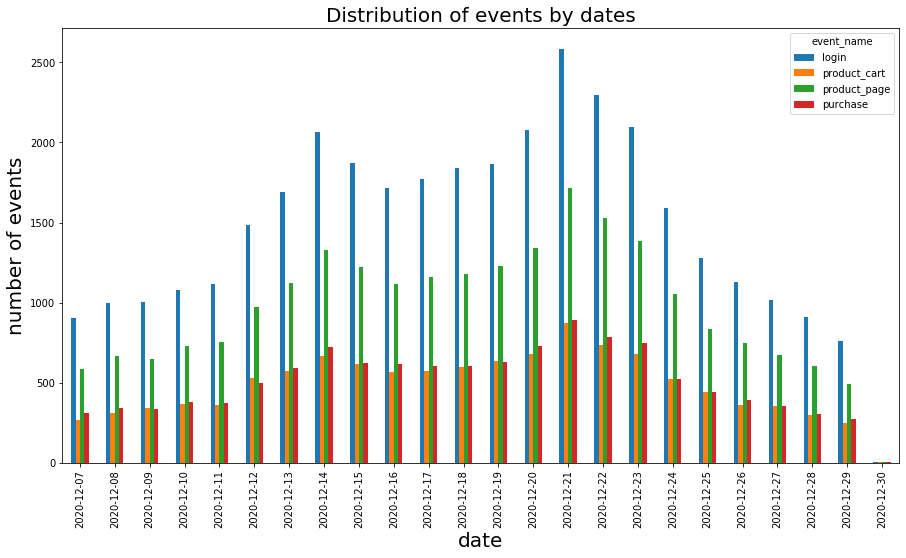

In [38]:
user_AB.groupby(['date', 'event_name'])['user_id'].count().unstack().fillna(0).plot.bar(figsize = (15, 8))
plt.title('Distribution of events by dates', size=20)
plt.xlabel('date', size=20)
plt.ylabel('number of events', size=20);

Looking at the graph for the distribution of events by date, we can see that the number is slowly going up as the christmas season approaches. the highest number was recorded on 2020-12-21 and  slowly goes down until the end of the month.The influx of users in the website has something to do with the season where people wanted to buy gifts.

#####  Think of the possible details in the data that you have to take into account before starting the A/B test?

The month where the samples was taken is quite peculiar. It is quite odd that the test was being conducted on the month of December, in the case of e-commerce site, it is most likely to have the traffic and conversion peak at this time which unique for the year and it can create bias. Customers behave differently on christmas rush and beacuse it is unique and we can only compare the result for that specific period of the year.By conducting a test on this season we are in danger of generalizing the result for the whole year.



##### Evaluate the A/B test results:

#### Hypothesis

   * *H0: There is no statistically significant difference in each group.*
   * *H1: There is s statistically significant difference in each group.*


<p><a name="ABtest"></a></p>

In [39]:
#creating  pivot table  for 3 columns needed in the function
exp_group = user_AB.pivot_table(index='event_name', values='user_id', columns='group', aggfunc=lambda x: x.nunique()).reset_index()

# find statistical significance for each group for each event
def hypothesis(group1, group2, alpha):

    # for every event
    for event in exp_group.event_name.unique():

        # define successes 
        stage1 = exp_group[exp_group.event_name == event][group1].iloc[0]
        stage2 = exp_group[exp_group.event_name == event][group2].iloc[0]

        # define trials
        trial1 = user_AB[user_AB.group == group1]['user_id'].nunique()
        trial2 = user_AB[user_AB.group == group2]['user_id'].nunique()

        # proportion for success in group 1
        p1 = stage1 / trial1

        # proportion for success in group 2
        p2 = stage2 / trial2

        # proportion in a combined dataset
        combined_data = (stage1 + stage2) / (trial1 + trial2)

        # define difference and z value
        diff = p1 - p2
        z_value = diff / math.sqrt(combined_data * (1 - combined_data) * (1/trial1 + 1/trial2))

        # calculate distribution
        distr = stats.norm(0,1)
        
        # calculate p_value
        p_value = (1 - distr.cdf(abs(z_value))) * 2
        print('p_value: ', p_value)
        if (p_value < alpha):
            print("Reject H0 for",event, 'and groups ',group1,' and ', group2, '\n')
        else:
            print("Fail to Reject H0 for", event,'and groups ',group1,' and ', group2, '\n')

In [40]:
hypothesis('A', 'B', 0.05)

p_value:  0.814062888768059
Fail to Reject H0 for login and groups  A  and  B 

p_value:  0.0859111947332698
Fail to Reject H0 for product_cart and groups  A  and  B 

p_value:  0.30875632339671144
Fail to Reject H0 for product_page and groups  A  and  B 

p_value:  0.01826370095380514
Reject H0 for purchase and groups  A  and  B 



<p><a name="#step2_conclusion"></a></p>

#### conclusion

The sample group collected was on the month of December in EU region.There is an upward trend of traffic as the Christmas season approaches and the trend starts going down after Dec. 24. It is in the Login and product page events where we lose most visitors.Upon checking The statistical difference for both group using Z-test for all events, we found out that 3 events namely: login, product_cart, has  the p_value of all greater than our alpha therefore the null hypothesis is correct, there is no statistically significant difference in each group. While for purchase event, the p_value was lesser than our alpha, meaning there is a significant difference in each group,and in this event is where the conversion happens and so I therefore conclude that group A has a higher conversion compared to group B.